In [1]:
# Linear Regression testing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("synthetic_dataset_with_patterns.csv")

# Display the dataset
print("Dataset:\n", df.head())

Dataset:
   Query ID Shard ID Query Type  Data Size (MB)  Execution Time (s)  \
0     Q001  Shard_1       JOIN             506                2.12   
1     Q002  Shard_5     UPDATE             256                2.29   
2     Q003  Shard_2     UPDATE             163                1.31   
3     Q004  Shard_2     SELECT             104                1.80   
4     Q005  Shard_1     SELECT             264                1.93   

   CPU Usage (%)  Memory Usage (MB)  I/O Operations            Timestamp  
0             87                799             149  2025-03-01 10:37:49  
1             73                735             130  2025-03-01 10:44:48  
2             84                687              53  2025-03-01 10:23:08  
3             72                555              87  2025-03-01 10:12:26  
4             67                546              53  2025-03-01 10:46:38  


In [3]:
# Features and target
features = ['Data Size (MB)', 'CPU Usage (%)', 'Memory Usage (MB)', 'I/O Operations']
target = 'Execution Time (s)'

X = df[features]
y = df[target]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [9]:
# prompt: write code for printing accuracy, precision, f1 score, and recall

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Assuming y_test and y_pred are already defined (from your previous code)
# and that you have a classification problem where y_pred contains class labels

# Convert predicted probabilities to class labels if needed (example using 0.5 threshold)
# y_pred_labels = (y_pred > 0.5).astype(int)  # Example for binary classification

# Calculate metrics
# accuracy = accuracy_score(y_test, y_pred_labels)
# precision = precision_score(y_test, y_pred_labels, average='weighted')  # Use 'weighted' for multi-class
# f1 = f1_score(y_test, y_pred_labels, average='weighted')
# recall = recall_score(y_test, y_pred_labels, average='weighted')

# If you have a regression problem, you will need to convert the predictions to classes for these metrics.
# For example, using a threshold based on the mean of y_test
threshold = np.mean(y_test)
y_pred_labels = (y_pred > threshold).astype(int)
y_test_labels = (y_test > threshold).astype(int)


accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_test_labels, y_pred_labels, average='weighted', zero_division=1)



print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")


Accuracy: 0.8033333333333333
Precision: 0.8102080085519575
F1 Score: 0.8035409836065575
Recall: 0.8033333333333333


In [10]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nRegression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Regression Metrics:
Mean Squared Error (MSE): 0.21
R-squared (R²): 0.53
Mean Absolute Error (MAE): 0.38


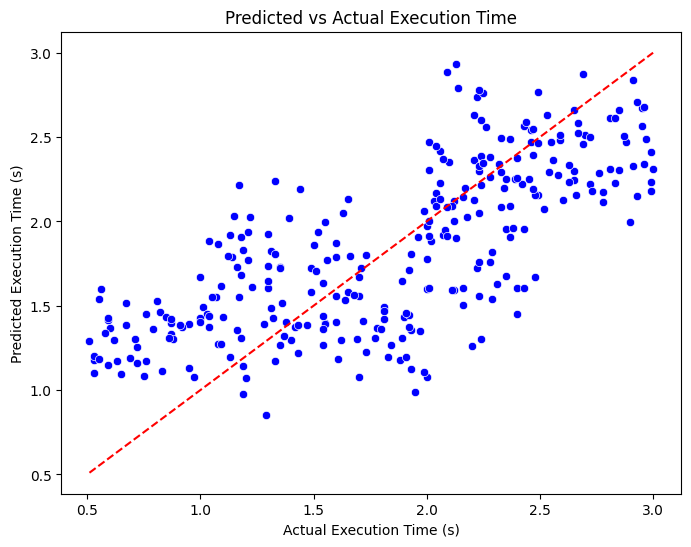

In [11]:
# Visualization 1: Predicted vs Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Predicted vs Actual Execution Time')
plt.xlabel('Actual Execution Time (s)')
plt.ylabel('Predicted Execution Time (s)')
plt.show()

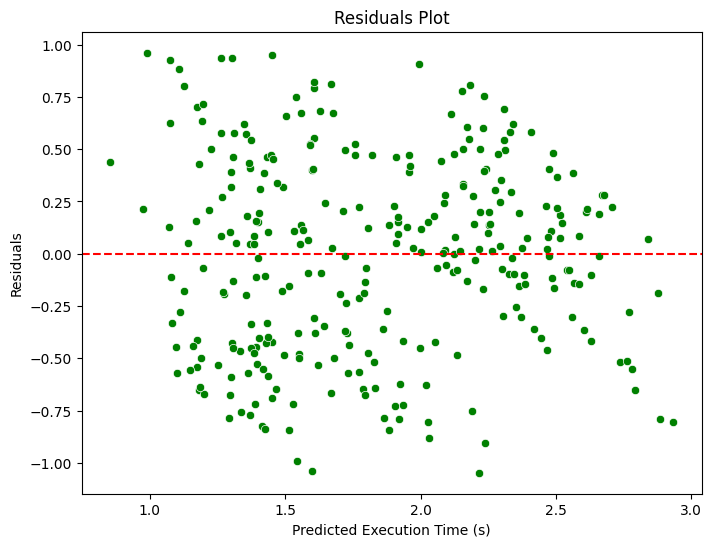

In [12]:
# Visualization 2: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Predicted Execution Time (s)')
plt.ylabel('Residuals')
plt.show()

<ipython-input-13-d848c46cbf50>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


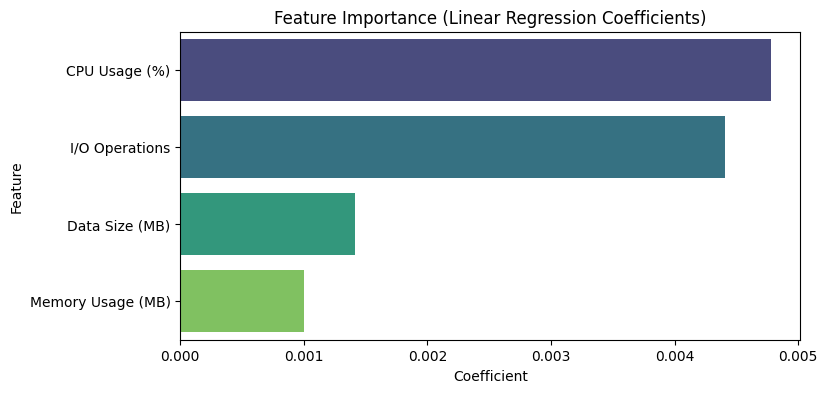

In [13]:
# Feature Importance (Linear Regression Coefficients)
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [14]:
# Function to simulate Dynamic Sharding Based on Query Load
def dynamic_sharding(df):
    # Simple thresholding to simulate dynamic sharding
    for idx, row in df.iterrows():
        if row['Execution Time (s)'] > 2.0 or row['CPU Usage (%)'] > 75:
            new_shard = f"Shard_{random.randint(1, 5)}"  # Assign a new shard
            df.at[idx, 'Shard ID'] = new_shard  # Update shard ID based on load
    return df


In [15]:
# Simulate a predictive model for Data Growth based on past data (using linear regression)
def predict_data_growth(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].map(lambda x: x.timestamp())  # Convert to Unix timestamp

    X = df[['Timestamp']]  # Features (time)
    y = df['Data Size (MB)']  # Target (data size)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future data size (next timestamp)
    future_timestamp = np.array([[df['Timestamp'].max() + 100]])  # Predict for the next time point
    predicted_growth = model.predict(future_timestamp)

    return predicted_growth[0]

In [16]:
# Simulating predictive sharding adjustment based on predicted data growth
def predictive_sharding(df, predicted_growth):
    # Adjust sharding based on the predicted growth in data size
    for idx, row in df.iterrows():
        if row['Data Size (MB)'] + predicted_growth > 500:
            df.at[idx, 'Shard ID'] = f"Shard_{random.randint(1, 5)}"  # Move to a new shard if data is predicted to grow beyond 500 MB
    return df

In [17]:
# Simulating Dynamic Sharding
df_dynamic_sharded = dynamic_sharding(df.copy())

In [18]:
# Predict future data growth
predicted_growth = predict_data_growth(df)
print(f"\nPredicted Data Growth (next time period): {predicted_growth:.2f} MB")


Predicted Data Growth (next time period): 332.46 MB


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# Simulating Predictive Sharding
df_predictive_sharded = predictive_sharding(df_dynamic_sharded.copy(), predicted_growth)

In [20]:
# Final output after dynamic and predictive sharding
print("\nFinal Dataset after Dynamic and Predictive Sharding:\n", df_predictive_sharded.head())



Final Dataset after Dynamic and Predictive Sharding:
   Query ID Shard ID Query Type  Data Size (MB)  Execution Time (s)  \
0     Q001  Shard_1       JOIN             506                2.12   
1     Q002  Shard_5     UPDATE             256                2.29   
2     Q003  Shard_2     UPDATE             163                1.31   
3     Q004  Shard_2     SELECT             104                1.80   
4     Q005  Shard_2     SELECT             264                1.93   

   CPU Usage (%)  Memory Usage (MB)  I/O Operations            Timestamp  
0             87                799             149  2025-03-01 10:37:49  
1             73                735             130  2025-03-01 10:44:48  
2             84                687              53  2025-03-01 10:23:08  
3             72                555              87  2025-03-01 10:12:26  
4             67                546              53  2025-03-01 10:46:38  


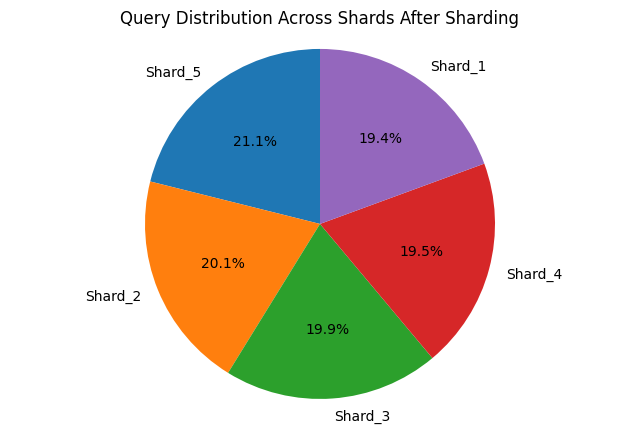

In [21]:
# Data Visualization: Shard Distribution After Sharding
plt.figure(figsize=(8, 5))
shard_counts = df_predictive_sharded['Shard ID'].value_counts()
plt.pie(shard_counts, labels=shard_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Query Distribution Across Shards After Sharding')
plt.axis('equal')
plt.show()